### Student Information
Name:m Lee Young Jin

Student ID: 109006244

GitHub ID: j-lee-cob

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import seaborn as sns
import math
import matplotlib.pyplot as plt
import helpers.data_mining_helpers as dmh
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
datafiles = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

#Ex 1)
for i in range(3):
    print(f"Example {i+1}")
    print("\n".join(datafiles.text[i].split("\n")))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/youngjinlee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Example 1
Calls on retards
Example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Example 3
Seeing lots of red in the ticker.


In [2]:
# 2
datafiles.get(["text","label"])


datafiles.loc[0]

#Drop some column that is not significant to our target
feature_deletion = ["datetime","post_id","url","author"]

datafiles = datafiles.drop(feature_deletion,axis=1, errors='ignore')

# 3
datafiles[datafiles["label"] == 1.0].iloc[::10].head(5)



,type,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
3,post,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
78,comment,StockMarket,$ U.S. dollar value (crashing),1,NaN,NaN,I think it’s gonna work itself out. I bought t...,0.133333,-0.133333,-1.0,"['trading', 'app', 'gloom', 'doom', 'gon']",1.0
168,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,1,NaN,NaN,The obvious can also be refreshing from CNBC: ...,0.750000,0.250000,1.0,"['bond', 'U.S', 'dollar', '’', 'Fed', 'CNBC', ...",1.0
219,comment,stockstobuytoday,APLS stocks,1,NaN,NaN,Same. Back to break even after that last rip b...,0.300000,0.144444,1.0,"['rip', 'Same', 'Back', '%', 'thing']",1.0
319,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Etrade has a feed of news articles about how r...,0.000000,0.000000,0.0,"['news', 'actual-reddit', 'reddit', 'GME', 'Et...",1.0


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

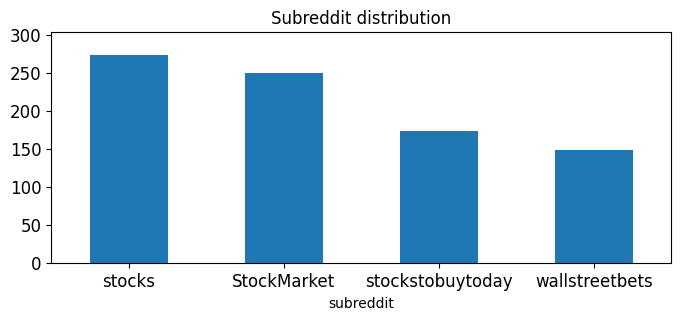

In [3]:
datafiles.isnull()

#Exercise 4
datafiles.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)



#Exercise 7
#Plot Semtiment label distrubution
datafiles.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit distribution',
                                           ylim = [0, datafiles.subreddit.value_counts().max() + 30], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Sentiment Label Distribution Comparision'}, xlabel='label'>

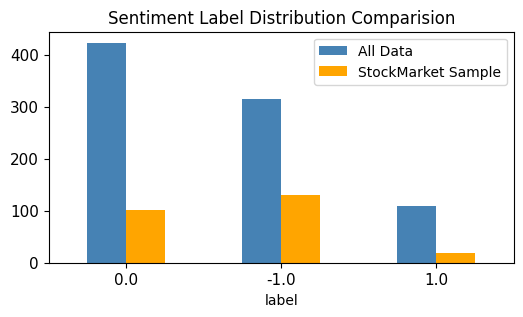

In [4]:
#Exercise 8
# Make sure df_sm exists first
df_sm = datafiles[datafiles["subreddit"].str.casefold() == "stockmarket"]

#Combine subreddit distribution from both datasets
compare= pd.concat([
    datafiles['label'].value_counts().rename('All Data'),
    df_sm['label'].value_counts().rename('StockMarket Sample')
], axis=1).fillna(0)

compare.plot(
    kind='bar',
    figsize=(6,3),
    rot=0,
    fontsize=11,
    title='Sentiment Label Distribution Comparision',
    color=['steelblue', 'orange']
)

In [5]:
#text tokenizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
datafiles_counts = count_vect.fit_transform(datafiles.text) 

In [6]:
#Excercise 9
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze = count_vect.build_analyzer()

analyze(datafiles.text[0])

['calls', 'on', 'retards']

In [7]:
datafiles_counts.shape

# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

datafiles_counts.shape
datafiles_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [8]:
count_vect.get_feature_names_out()[0:1]
#Exercise 10
# Answer here
for i in range(0, 2):  
    print(i, count_vect.get_feature_names_out()[i])

0 00
1 000


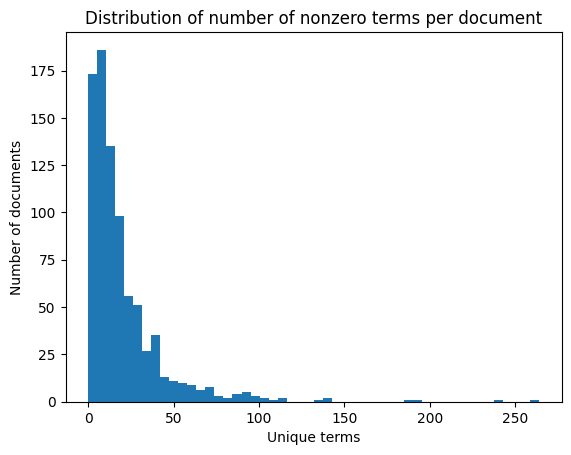

array([  3,  23,   7,  90,   5,  11,  42,  21,  29,  13,   6,  14,   9,
        41,   6,   2,   2,  73,   3,  90,   8,   2,   7,  32,   3,  14,
        13,   4,   8,   7,  24, 264,  11,   2,  14,  32,  23,   1,  10,
        38,  15,   2,  14,   8,  41,   4,  23,  12,  12,   5,   2,  14,
        34,  24,  18,   2,  25,  14,   6,   4,  11,   7,   2, 140,   3,
        10,  54,   3,   7,  38,   5,   3,  75,  49,  10,   9,   6,  41,
        17,  44,  14,  15,  20,   8,   6,  23,  25, 238,   7,  33,   8,
         7,  33,  27,   7,  11,   5,  30,  55,  14,  14,   6,  26,   8,
         6,   4,   2,   3,   6,   1,  41,   6,   4,  16,  15,  28,  24,
        12,  28,   8,   9,   4,  42,  23,   8,  19,   5,   1,  21,  27,
        40,   5,  12,  22,   7,  12,  53,  12,  16,   1,  15,   3,  35,
         8,  56,  71,  26,  18, 138,  28,   6,  13,  20,  12,  14,   1,
        45,  20,  14,   5,  70,  64,   7,  14,  14,  31,   1,   2,  21,
       108,   1,  15,  34,   2,  11,  39,  14,  14,   4,   8,  1

In [9]:
#Exercise 11
datafiles_density = (datafiles_counts > 0).sum(axis=1).A1  # nonzeros per doc
plt.hist(datafiles_density, bins=50)
plt.title("Distribution of number of nonzero terms per document")
plt.xlabel("Unique terms")
plt.ylabel("Number of documents")
plt.show()
datafiles_density

/var/folders/v5/h06kf79165lc4b0f6ywj7ww40000gn/T/ipykernel_3205/1925587925.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


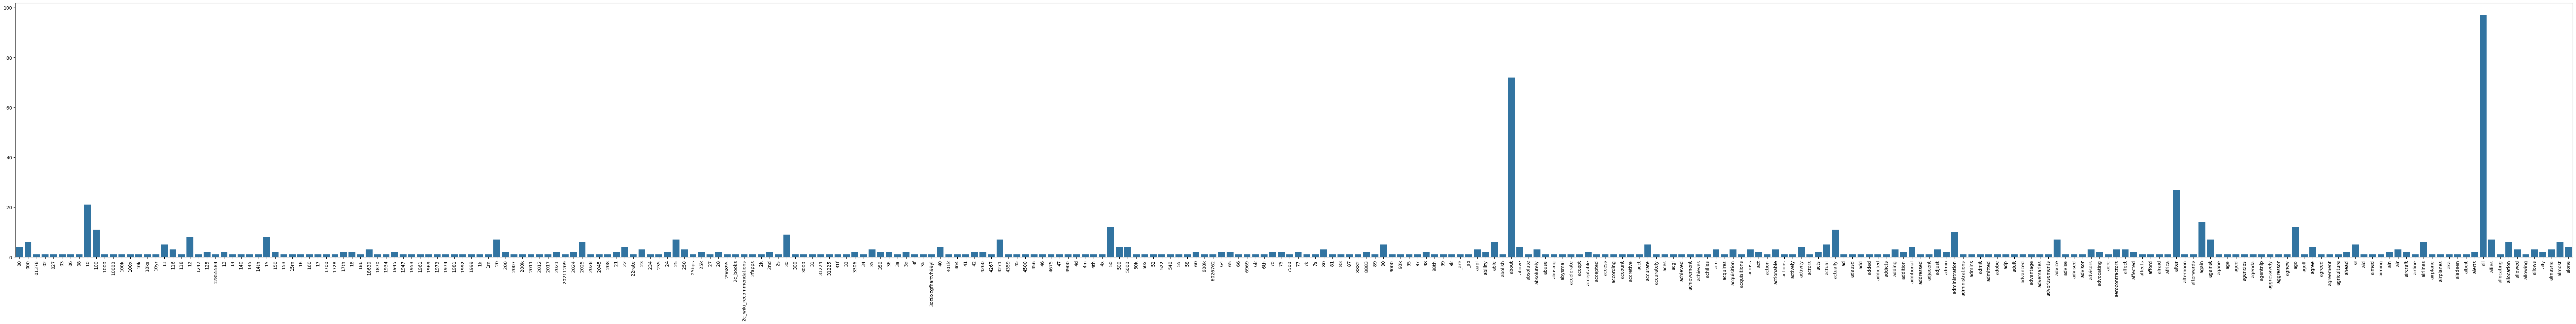

In [10]:

term_frequencies = []
for j in range(0,datafiles_counts.shape[1]):
    term_frequencies.append(sum(datafiles_counts[:,j].toarray()))

term_frequencies = np.asarray(datafiles_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00
np.int64(134)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
#Exercise 12
import plotly.express as px
import pandas as pd


datafiles_bar = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})


fig = px.bar(datafiles_bar,
             x="term",
             y="frequency",
             title="Top 300 Term Frequencies")


fig.update_layout(
    xaxis_tickangle=90,
    width=2000,  
    height=400
)

fig.show()

In [11]:
#Exercise 13
# Answer here
import pandas as pd
import plotly.express as px

# Build DataFrame of all terms + their frequencies
datafiles_terms = pd.DataFrame({
    "term": count_vect.get_feature_names_out(),
    "frequency": term_frequencies
})

# Sort by frequency and keep top 30
datafiles_top = datafiles_terms.sort_values("frequency", ascending=False).head(50)

# Plot
fig = px.bar(datafiles_top, x="term", y="frequency", color="frequency",                 # gradient coloring
    color_continuous_scale="Turbo",  title="Top 50 Term Frequencies")
fig.update_layout(xaxis_tickangle=90)
fig.show()


In [12]:
#Exercise 14

# Answer here
import numpy as np
import plotly.express as px


N = 150 


top_indices = np.argsort(term_frequencies)[::-1][:N]


fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices],
    y=term_frequencies[top_indices],
    labels={'x': 'Terms', 'y': 'Frequency'},
    title=f"Top {N} Term Frequencies"
)


fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,
    height=600
)

fig.show()



In [13]:
#Exercise 15
import numpy as np
import plotly.express as px

#Transform raw counts to log scale
term_frequencies_log = np.log1p(term_frequencies)

N = 100
top_indices = np.argsort(term_frequencies_log)[::-1][:N]

fig = px.bar(
    x=count_vect.get_feature_names_out()[top_indices],
    y=term_frequencies_log[top_indices],
    color=term_frequencies_log[top_indices],        # gradient by frequency
    color_continuous_scale='Viridis',              #colors
    labels={'x': 'Terms', 'y': 'Log(1 + Frequency)'},
    title=f"Top {N} Terms (log-scaled frequencies)"
)

fig.update_layout(
    xaxis=dict(tickangle=90),
    width=1200,
    height=600
)

fig.show()

#The tallest bar shrink relatively more than the shorter ones
#Extremely high frequemcy word doesn't take over the whole chart

# Phase 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load your dataset
X = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# Map columns to what your code expects
X['category_name'] = X['subreddit']   # use  as category



categories = X['category_name'].unique()
category_dfs = {}

for category in categories:
    category_dfs[category] = X[X['category_name'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['text'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

filt_term_document_dfs = {}

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# === (Optional) TF-IDF version in same simple style ===
def create_tfidf_document_df(df):
    tfidf_vect = TfidfVectorizer()
    X_tfidf = tfidf_vect.fit_transform(df['text'])
    words = tfidf_vect.get_feature_names_out()
    tfidf_document_df = pd.DataFrame(X_tfidf.toarray(), columns=words)
    return tfidf_document_df

filt_tfidf_document_dfs = {}

for category in categories:
    filt_tfidf_document_dfs[category] = create_tfidf_document_df(category_dfs[category])


In [3]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,10,100,1000,10k,12,17th,186,18630,1934,1981,...,xi,year,years,yesterday,yet,yippee,you,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


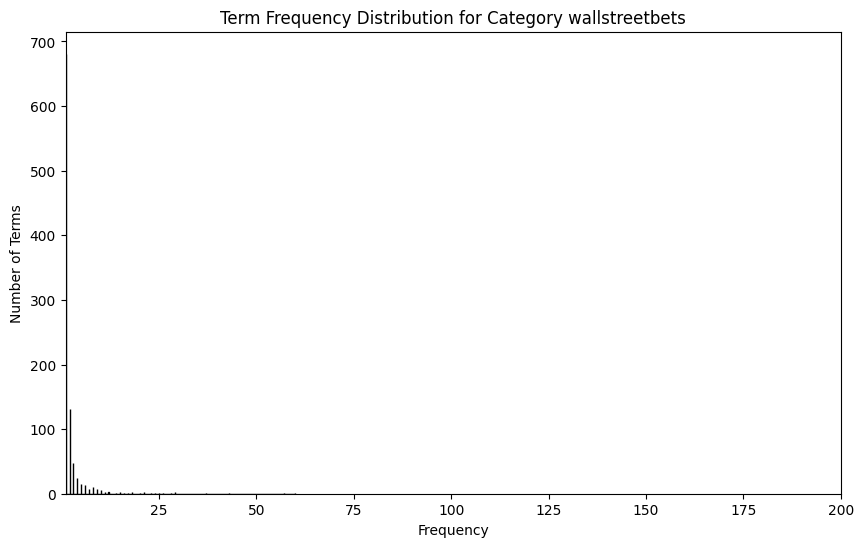

In [6]:
 # Sum over all documents to get total frequency for each word
import matplotlib.pyplot as plt
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [8]:
import numpy as np
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: wallstreetbets
Number of terms in top 5%: 48
Filtered terms: ['to', 'the', 'it', 'and', 'in', 'is', 'you', 'for', 'they', 'this', 'of', 'my', 'that', 'on', 't5_2th52', 'emote', 'img', 'so', 'like', 'but', 'can', 'just', 'at', 'are', 'have', 'over', 'all', 'was', 'target', 'will', 'be', 'now', 'not', 'we', 'about', 'there', 'what', 'puts', 'no', 'good', 'up', 'make', 'she', 're', 'time', 'with', 'still', 'market']


In [9]:
sorted_counts #We can see the frequencies sorted in a descending order

array([60, 57, 43, 37, 29, 29, 28, 26, 25, 24, 23, 21, 21, 20, 18, 18, 18,
       17, 16, 15, 15, 15, 14, 12, 12, 11, 11, 11, 10, 10, 10, 10, 10, 10,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [10]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([864, 843, 479,  80, 456, 477, 968, 358, 850, 853, 607, 581, 842,
       611, 822, 309, 453, 772, 510, 161, 170, 487,  98,  92, 420, 625,
        68, 913, 830, 940, 115, 605, 602, 918,  46, 848, 930, 681, 598,
       392, 888, 538, 751, 688, 861, 945, 799, 545, 931, 387, 743, 452,
       969,  30, 380, 832, 891, 194, 552, 920, 433, 168, 269, 847, 615,
       964, 254, 164, 715, 900, 512, 118, 844, 613,  58, 714, 623, 506,
       101, 514,   0, 318, 845, 927,  93, 936, 162, 427, 572, 571, 587,
       501, 515, 938, 732, 536, 123, 908, 520, 389, 418, 865, 422, 218,
       390, 351, 270, 963, 624, 290, 960, 954,   7, 935, 928, 962, 643,
       668, 362, 381, 840, 282, 288, 278, 348, 366, 408, 388, 395,  73,
        74, 127, 911, 496, 509, 543, 530, 745, 524, 921, 955, 608, 621,
       689, 716,  75, 480, 128, 130, 107, 868, 764, 255, 192, 852, 793,
       421, 776, 368, 370, 626,  33, 952, 374, 379, 355, 343, 341, 329,
       349, 826, 280, 304, 330, 263, 256, 839, 837, 857, 319, 29

In [11]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(57)

In [12]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: wallstreetbets
Number of terms in bottom 1%: 9
Filtered terms: ['31224', '31225', '350', '1981', '1m', '20', '200k', '2012', '2021']


In [13]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [14]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([ 22,  23,  24,   9,  10,  11,  12,  13,  14,  15, 944, 947, 948,
       949, 950, 682,  45,  47,   1,   2,   3,   4,   5,   6,   8, 953,
       970, 971, 956, 957, 958,  21,  48,  50,  51,  52,  53,  54,  56,
        57,  59,  60,  61,  62,  32,  34,  35,  36,  90,  91,  64,  66,
        67,  69, 937, 941, 942, 943, 915, 916, 919,  76,  77,  78,  84,
        85,  86,  88, 922, 924, 925, 896, 897, 898, 899, 901, 902, 903,
       904,  89, 125, 126,  96,  97,  99, 100, 102, 103, 104, 105, 108,
       110, 111,  81,  82,  83, 119, 120, 905, 906, 907, 909, 880, 881,
       882, 883, 884, 886, 887, 121, 122, 124, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 112, 113, 114, 116, 117, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 159, 129,
       131, 889, 890, 892, 893, 894, 895, 866, 867, 869, 872, 169, 171,
       172, 173, 174, 175, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 160, 163, 165, 166, 167, 195, 196, 197, 198, 19

In [16]:
filt_term_document_dfs[categories[category_number]].loc[:,'31224'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

In [17]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
31224    1
31225    1
350      1
1981     1
1m       1
20       1
200k     1
2012     1
2021     1
dtype: int64
Top 5.0% words: 
market       8
still        8
with         8
time         8
re           8
she          8
make         8
up           9
good         9
no           9
puts         9
what         9
there        9
about        9
we          10
not         10
now         10
be          10
will        10
target      10
was         11
all         11
over        11
have        12
are         12
at          14
just        15
can         15
but         15
like        16
so          17
img         18
emote       18
t5_2th52    18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following words:
B

,10,100,1000,10k,12,17th,186,18630,1934,208,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from PAMI.extras.convert.DF2DB import DF2DB

# Create transactional databases for each subreddit in the Reddit dataset
for subreddit in filt_term_document_dfs:   
    
    subreddit_safe = str(subreddit).replace('.', '_').replace(' ', '_')
    
    # Create the DF2DB object for this subreddit
    obj = DF2DB(filt_term_document_dfs[subreddit])
    
   
    obj.convert2TransactionalDatabase(f'reddit_td_freq_db_{subreddit_safe}.csv', '>=', 1)

for subreddit in list(filt_term_document_dfs.keys())[:5]:  # show a few examples
    print(f" - reddit_td_freq_db_{str(subreddit).replace('.', '_').replace(' ', '_')}.csv")


 - reddit_td_freq_db_wallstreetbets.csv
 - reddit_td_freq_db_StockMarket.csv
 - reddit_td_freq_db_stockstobuytoday.csv
 - reddit_td_freq_db_stocks.csv



===== Analyzing SUBREDDIT: WALLSTREETBETS (reddit_td_freq_db_wallstreetbets.csv) =====
Database size (total no of transactions) : 148
Number of items : 972
Minimum Transaction Size : 1
Average Transaction Size : 13.83108108108108
Maximum Transaction Size : 88
Standard Deviation Transaction Size : 13.399974038656534
Variance in Transaction Sizes : 180.78079610222468
Sparsity : 0.9857704927149371


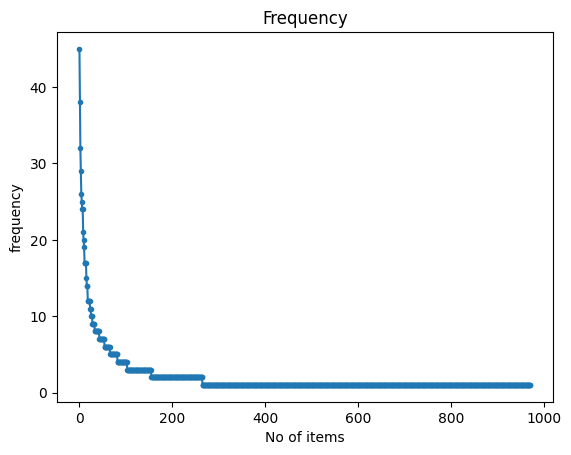

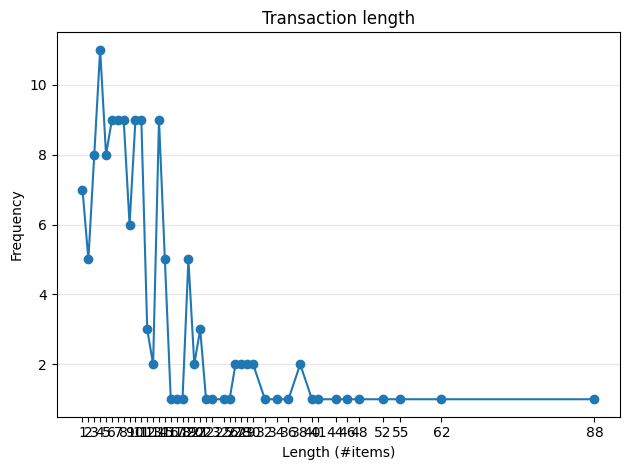


===== Analyzing SUBREDDIT: STOCKMARKET (reddit_td_freq_db_StockMarket.csv) =====
Database size (total no of transactions) : 250
Number of items : 1593
Minimum Transaction Size : 1
Average Transaction Size : 17.732
Maximum Transaction Size : 192
Standard Deviation Transaction Size : 18.383366829827445
Variance in Transaction Sizes : 339.30539759036145
Sparsity : 0.9888688010043942


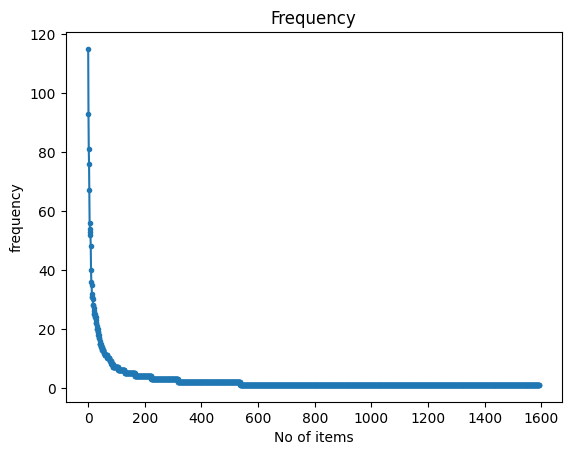

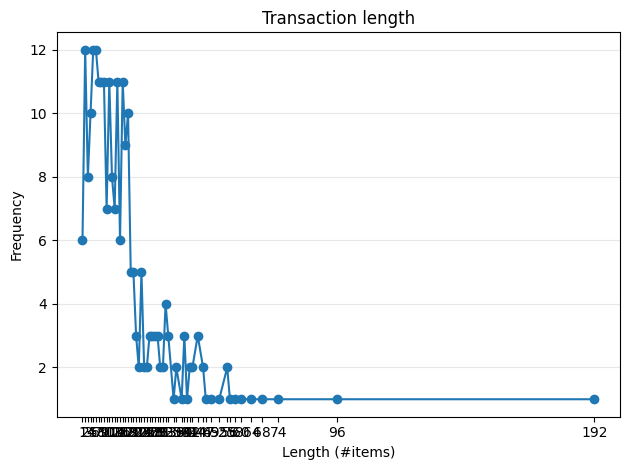


===== Analyzing SUBREDDIT: STOCKSTOBUYTODAY (reddit_td_freq_db_stockstobuytoday.csv) =====
Database size (total no of transactions) : 173
Number of items : 1618
Minimum Transaction Size : 1
Average Transaction Size : 21.023121387283236
Maximum Transaction Size : 264
Standard Deviation Transaction Size : 33.55849930801546
Variance in Transaction Sizes : 1132.720392525877
Sparsity : 0.9870067234936445


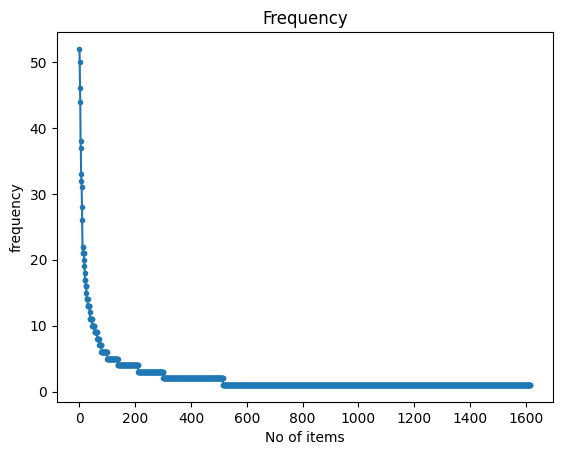

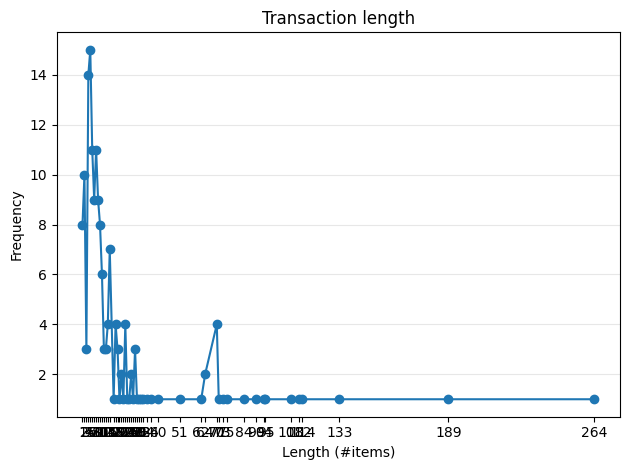


===== Analyzing SUBREDDIT: STOCKS (reddit_td_freq_db_stocks.csv) =====
Database size (total no of transactions) : 274
Number of items : 2346
Minimum Transaction Size : 1
Average Transaction Size : 25.824817518248175
Maximum Transaction Size : 238
Standard Deviation Transaction Size : 26.189622341632905
Variance in Transaction Sizes : 688.4087591240876
Sparsity : 0.9889919788924774


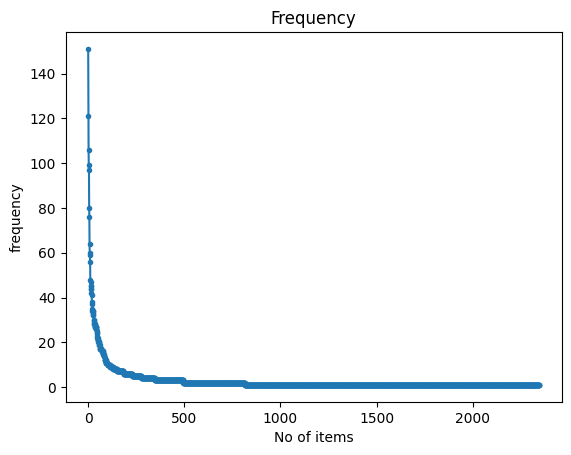

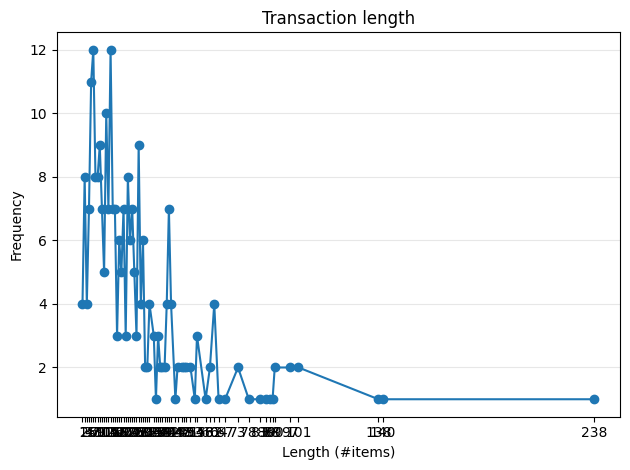

In [22]:
from PAMI.extras.dbStats import TransactionalDatabase as tds


files = [
    ("wallstreetbets",        "reddit_td_freq_db_wallstreetbets.csv"),
    ("StockMarket",           "reddit_td_freq_db_StockMarket.csv"),
    ("stockstobuytoday",      "reddit_td_freq_db_stockstobuytoday.csv"),
    ("stocks",                "reddit_td_freq_db_stocks.csv"),
]


for label, filename in files:
    print(f"\n===== Analyzing SUBREDDIT: {label.upper()} ({filename}) =====")
    
    # Load the transactional database for this subreddit
    obj = tds.TransactionalDatabase(filename)
    obj.run()
    
    # Print dataset statistics
    obj.printStats()
    
    # Plot graphs for visual analysis
    obj.plotGraphs()



In [41]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj1 = alg.FPGrowth(iFile='reddit_td_freq_db_wallstreetbets.csv', minSup=minSup)  # try -1, 0, or 1 version
obj1.mine()

frequentPatternsDF_reddit_stock_wallstreetbets = obj1.getPatternsAsDataFrame()

print('Total No of patterns:', len(frequentPatternsDF_reddit_stock_wallstreetbets))  # total number of patterns
print('Runtime:', obj1.getRuntime())  # measure runtime


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 65
Runtime: 0.013859987258911133


In [42]:
obj1.save('freq_patterns_reddit_stock_wallstreetbets_minSup9.txt')
frequentPatternsDF_reddit_stock_wallstreetbets

,Patterns,Support
0,not,9
1,target,9
2,will,9
3,puts,9
4,what,9
...,...,...
60,it\tthe\tto,10
61,it\tto,15
62,to,38
63,to\tthe,17


In [43]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj2 = alg.FPGrowth(iFile='reddit_td_freq_db_stockstobuytoday.csv', minSup=minSup)  # try -1, 0, or 1 version
obj2.mine()

frequentPatternsDF_reddit_stock_stockstobuytoday = obj2.getPatternsAsDataFrame()

print('Total No of patterns:', len(frequentPatternsDF_reddit_stock_stockstobuytoday))  # total number of patterns
print('Runtime:', obj2.getRuntime())  # measure runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1530
Runtime: 0.03364682197570801


In [44]:
obj2.save('freq_patterns_reddit_stock_stockstobuytoday_minSup9.txt')
frequentPatternsDF_reddit_stock_stockstobuytoday

,Patterns,Support
0,an,9
1,new,9
2,their,9
3,their\tthe,9
4,their\tand,9
...,...,...
1525,is\tthe\tto,21
1526,is\tto,28
1527,to,50
1528,to\tthe,33


In [45]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj3 = alg.FPGrowth(iFile='reddit_td_freq_db_stocks.csv', minSup=minSup)  # try -1, 0, or 1 version
obj3.mine()

frequentPatternsDF_reddit_stock_stocks = obj3.getPatternsAsDataFrame()

print('Total No of patterns:' + str(len(frequentPatternsDF_reddit_stock_stocks)))  # total number of patterns
print('Runtime:', obj3.getRuntime())  # measure runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns:7305
Runtime: 0.1854872703552246


In [ ]:
obj3.save('freq_patterns_reddit_stock_stocks_minSup9.txt')
frequentPatternsDF_reddit_stock_stocks

,Patterns,Support
0,already,9
1,american,9
2,gold,9
3,which,9
4,point,9
5,doesn,9
6,lmao,9
7,love,9
8,still,9
9,after,9


In [46]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj4 = alg.FPGrowth(iFile='reddit_td_freq_db_StockMarket.csv', minSup=minSup)  # try -1, 0, or 1 version
obj4.mine()

frequentPatternsDF_reddit_stock_StockMarket = obj3.getPatternsAsDataFrame()

print('Total No of patterns:' + str(len(frequentPatternsDF_reddit_stock_StockMarket)))  # total number of patterns
print('Runtime:', obj3.getRuntime())  # measure runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns:7305
Runtime: 0.1854872703552246


In [47]:
obj4.save('freq_patterns_reddit_stock_StockMarket_minSup9.txt')
frequentPatternsDF_reddit_stock_StockMarket

,Patterns,Support
0,companies,9
1,looking,9
2,doing,9
3,ve,9
4,right,9
...,...,...
7300,and\tto\tthe,54
7301,and\tthe,76
7302,to,121
7303,to\tthe,94


In [51]:
import pandas as pd


dfs = [
    frequentPatternsDF_reddit_stock_wallstreetbets,
    frequentPatternsDF_reddit_stock_stockstobuytoday,
    frequentPatternsDF_reddit_stock_stocks,
    frequentPatternsDF_reddit_stock_StockMarket

]


labels = ["wallstreetbets", "stockstobuytoday", "stocks", "StockMarket"]

# Count in how many categories each pattern appears
pattern_counts = {}
for df in dfs:
    for p in df['Patterns']:
        pattern_counts[p] = pattern_counts.get(p, 0) + 1



unique_patterns = {p for p, c in pattern_counts.items() if c == 1}



total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Filter each DF to unique patterns and tag category
filtered_dfs = []
for df, lab in zip(dfs, labels):
    tmp = df[df['Patterns'].isin(unique_patterns)].copy()
    tmp['Category'] = lab
    filtered_dfs.append(tmp)


final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Show results
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")


                   Patterns  Support          Category
1091           and\tis\tthe       23  stockstobuytoday
1088                and\tis       23  stockstobuytoday
1001                 of\ton       22  stockstobuytoday
518       stockbuyvest\tcom       21  stockstobuytoday
517            stockbuyvest       21  stockstobuytoday
...                     ...      ...               ...
575   of\tthat\tit\ton\tthe        9  stockstobuytoday
574       that\tit\ton\tthe        9  stockstobuytoday
1082       for\tis\tto\tthe        9  stockstobuytoday
1081  the\tfor\tis\tand\tto        9  stockstobuytoday
1076      this\tfor\tis\tto        9  stockstobuytoday

[1093 rows x 3 columns]
Number of patterns discarded: 15112


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Term–document matrix (Counts)
count_vect = CountVectorizer()                
X_tdm = count_vect.fit_transform(X['text'].astype(str))
terms = count_vect.get_feature_names_out()

#Use the SAME analyzer as CountVectorizer for tokenization (important!)
analyzer = count_vect.build_analyzer()
X['tokenized_text'] = X['text'].astype(str).apply(lambda s: set(analyzer(s)))


#    - robust to empty/NaN patterns
patterns = []
if 'Patterns' in final_pattern_df.columns and not final_pattern_df.empty:
    patterns = (
        final_pattern_df['Patterns']
        .dropna()
        .astype(str)
        .unique()
        .tolist()
    )

pattern_matrix = pd.DataFrame(0, index=X.index, columns=patterns)

for pattern in patterns:
    pattern_words = set(analyzer(pattern))  
    pattern_matrix[pattern] = X['tokenized_text'].apply(
        lambda tokens: 1 if pattern_words.issubset(tokens) else 0
    )

#Convert the term–document matrix to a DataFrame (simple version)
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

#Concatenate original TDM + pattern features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

#Result
augmented_df


,00,000,01378,02,027,03,06,08,10,100,...,that\tit\ton\tto,of\tthe\tthat\tit\ton\tand,the\tthat\tit\ton\tand,of\tthat\tit\ton\tand,that\tit\ton\tand,of\tthat\tit\ton\tthe,that\tit\ton\tthe,for\tis\tto\tthe,the\tfor\tis\tand\tto,this\tfor\tis\tto
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import pandas as pd
from ast import literal_eval
from PAMI.frequentPattern.topk import FAE
from PAMI.frequentPattern.maximal import MaxFPGrowth
from PAMI.frequentPattern.basic import FPGrowth


dataframes = {
    "wallstreetbets":    frequentPatternsDF_reddit_stock_wallstreetbets,
    "stocks":            frequentPatternsDF_reddit_stock_stocks,
    "StockMarket":       frequentPatternsDF_reddit_stock_StockMarket,
    "stockstobuytoday":  frequentPatternsDF_reddit_stock_stockstobuytoday,
}

# --- tiny helper to turn a 'Patterns' cell into a list of items ---
def to_items(x):
    if isinstance(x, (list, tuple, set)):
        return [str(i) for i in x]
    if isinstance(x, str):
        s = x.strip()
        # try to parse python-literal strings: "{'a','b'}", "('a','b')", "['a','b']"


        try:
            parsed = literal_eval(s)
            if isinstance(parsed, (list, tuple, set)):
                return [str(i) for i in parsed]
            
        except Exception:
            pass
        # fallback: simple split by commas or whitespace, stripping braces/quotes

        s = s.strip("{}()[]")
        toks = [t.strip(" '\"") for t in s.replace(",", " ").split() if t.strip(" '\"")]
        return toks
    return []


for label, df in dataframes.items():
    outfile = f"reddit_{label}_transactions.txt"
    with open(outfile, "w", encoding="utf-8") as f:
        f.write("Transactions\n")
        if "Patterns" in df.columns:
            for _, row in df.iterrows():
                items = to_items(row["Patterns"])
                if items:
                    f.write("\t".join(items) + "\n")
    dataframes[label] = outfile  


for label, infile in dataframes.items():

    # FAE Top-K
    for k in [500, 1000, 1500]:
        print(f"\n[{label.upper()}] FAE Top-K (k={k})")
        obj = FAE.FAE(iFile=infile, k=k)
        obj.mine()
        pats = obj.getPatterns()
        print(f"Total patterns: {len(pats)}")
        print(f"Runtime: {obj.getRuntime():.3f}s")
        if len(pats) > 0:
            print(list(pats.items())[:10])

    # MaxFPGrowth
    for minsup in [3, 6, 9]:
        print(f"\n[{label.upper()}] MaxFPGrowth (minSup={minsup})")
        obj = MaxFPGrowth.MaxFPGrowth(iFile=infile, minSup=minsup)
        obj.mine()
        pats = obj.getPatterns()
        print(f"Total patterns: {len(pats)}")
        print(f"Runtime: {obj.getRuntime():.3f}s")
        if len(pats) > 0:
            print(list(pats.items())[:10])

    # FP-Growth baseline
    for minsup in [3, 6, 9]:
        print(f"\n[{label.upper()}] FP-Growth (minSup={minsup})")
        obj = FPGrowth.FPGrowth(iFile=infile, minSup=minsup)
        obj.mine()
        pats = obj.getPatterns()
        print(f"Total patterns: {len(pats)}")
        print(f"Runtime: {obj.getRuntime():.3f}s")
        if len(pats) > 0:
            print(list(pats.items())[:10])



[WALLSTREETBETS] FAE Top-K (k=500)
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 43
Runtime: 0.002s
[('the', 15), ('to', 13), ('and', 9), ('it', 7), ('for', 5), ('emote', 4), ('img', 4), ('t5_2th52', 4), ('in', 4), ('so', 3)]

[WALLSTREETBETS] FAE Top-K (k=1000)
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 43
Runtime: 0.001s
[('the', 15), ('to', 13), ('and', 9), ('it', 7), ('for', 5), ('emote', 4), ('img', 4), ('t5_2th52', 4), ('in', 4), ('so', 3)]

[WALLSTREETBETS] FAE Top-K (k=1500)
 TopK frequent patterns were successfully generated using FAE algorithm.
Total patterns: 43
Runtime: 0.001s
[('the', 15), ('to', 13), ('and', 9), ('it', 7), ('for', 5), ('emote', 4), ('img', 4), ('t5_2th52', 4), ('in', 4), ('so', 3)]

[WALLSTREETBETS] MaxFPGrowth (minSup=3)
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total patterns: 11
Runtime: 0.001s
[('is\t', 3), ('you\t', 3), 

In [53]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [54]:
X_pca_tdm.shape

(847, 2)

In [55]:
X_tsne_tdm.shape

(847, 2)

In [56]:

X_umap_tdm.shape

(847, 2)

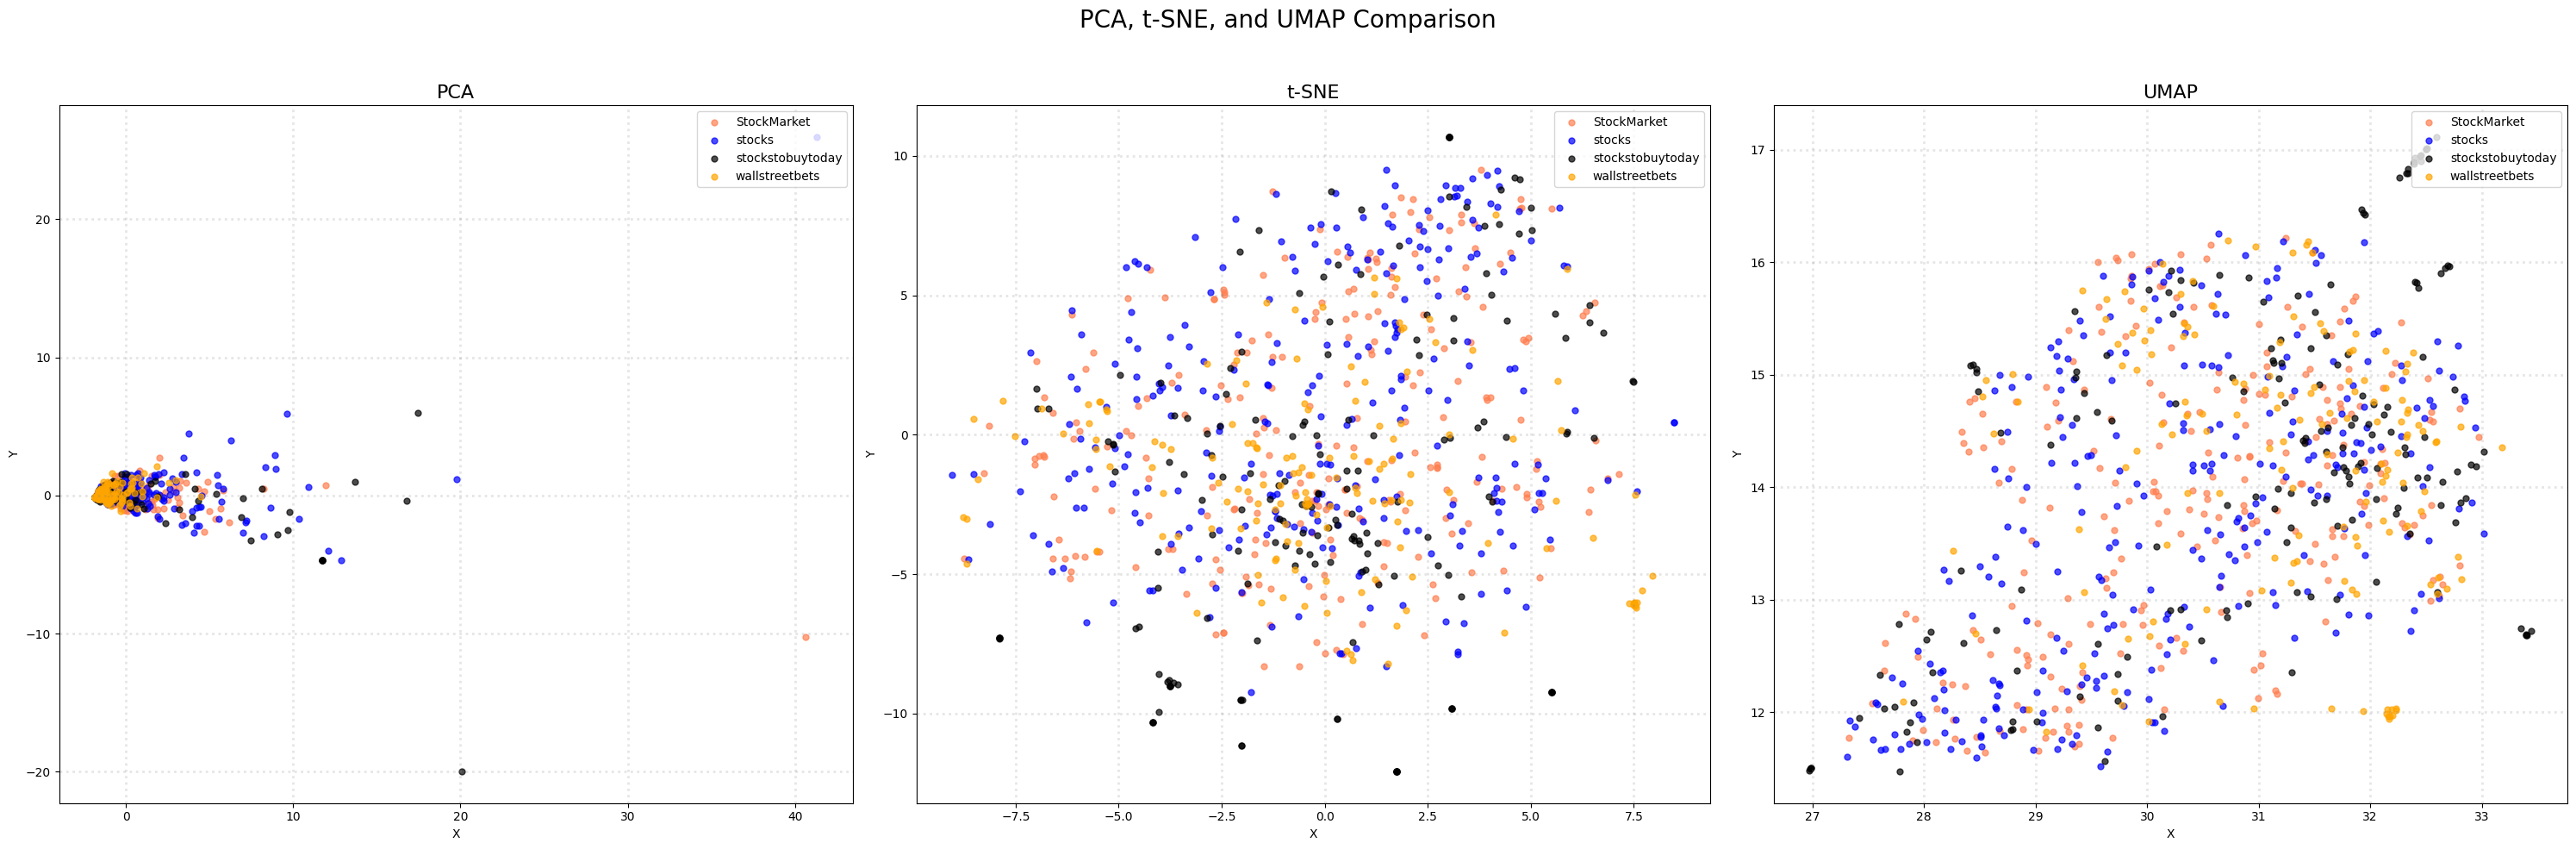

In [58]:
import matplotlib.pyplot as plt


categories = sorted(X['category_name'].unique())


col = ['coral', 'blue', 'black', 'orange', 'green', 'purple', 'brown', 'pink']
col = col[:len(categories)]  # Trim or extend as needed

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison', fontsize=20)

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        subset = X['category_name'] == category
        xs = X_reduced[subset, 0]
        ys = X_reduced[subset, 1]
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.7, s=25)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Plot for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [59]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

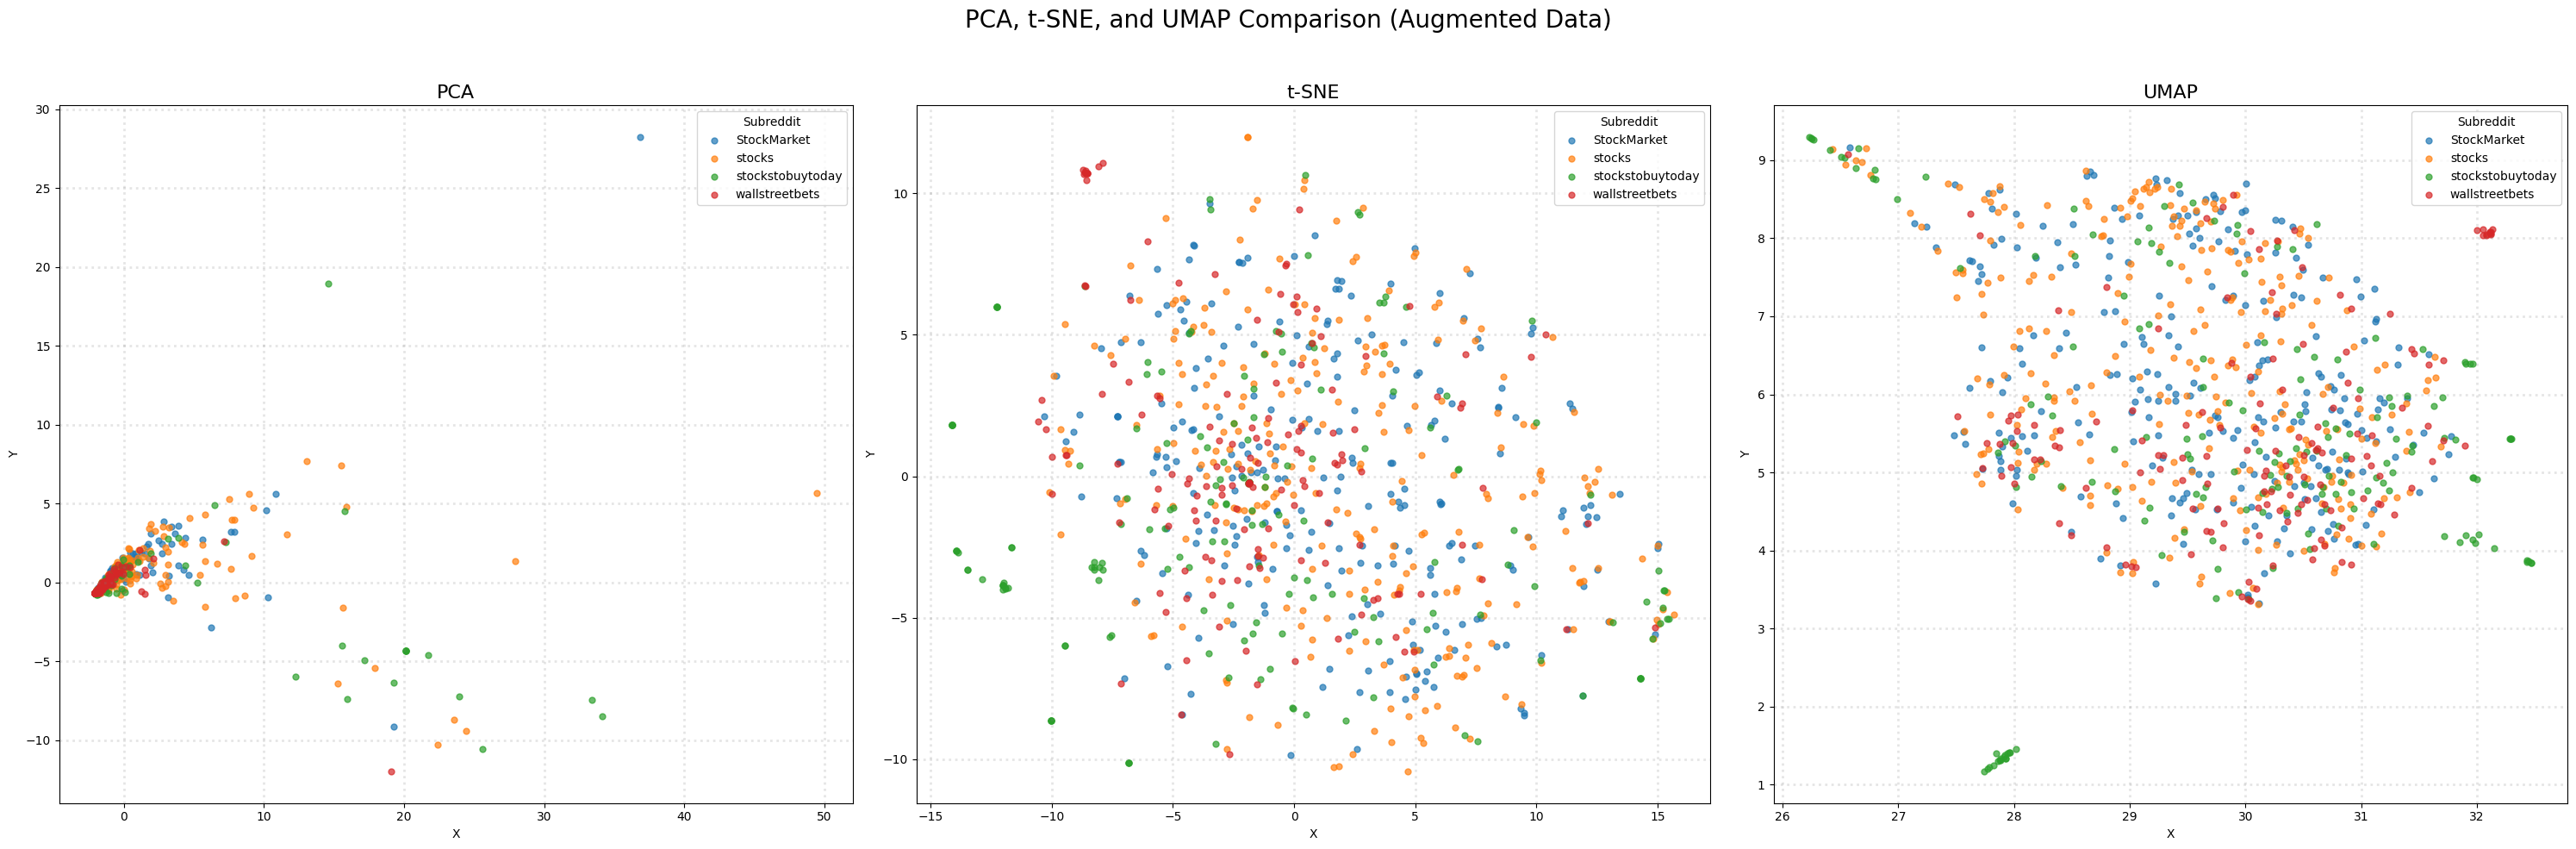

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns  # optional, gives nice distinct colors

# Make sure categories are in a fixed order
categories = sorted(X['category_name'].unique())

# Auto-generate distinct colors based on number of categories
col = sns.color_palette("tab10", n_colors=len(categories))

# Create 3 subplots for PCA, t-SNE, and UMAP
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (Augmented Data)', fontsize=20)

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        subset = X['category_name'] == category
        xs = X_reduced[subset, 0]
        ys = X_reduced[subset, 1]
        ax.scatter(xs, ys, color=c, marker='o', label=category, s=25, alpha=0.7)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(title="Subreddit", loc='upper right')

# Plot each embedding
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


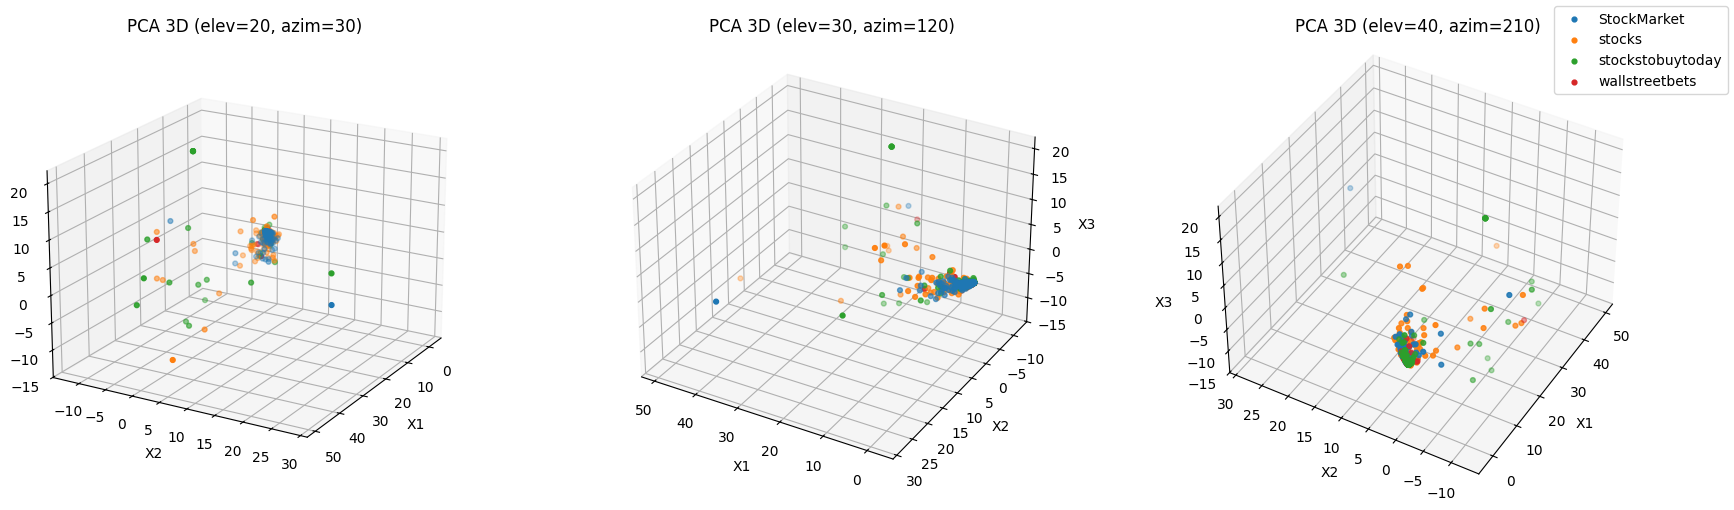

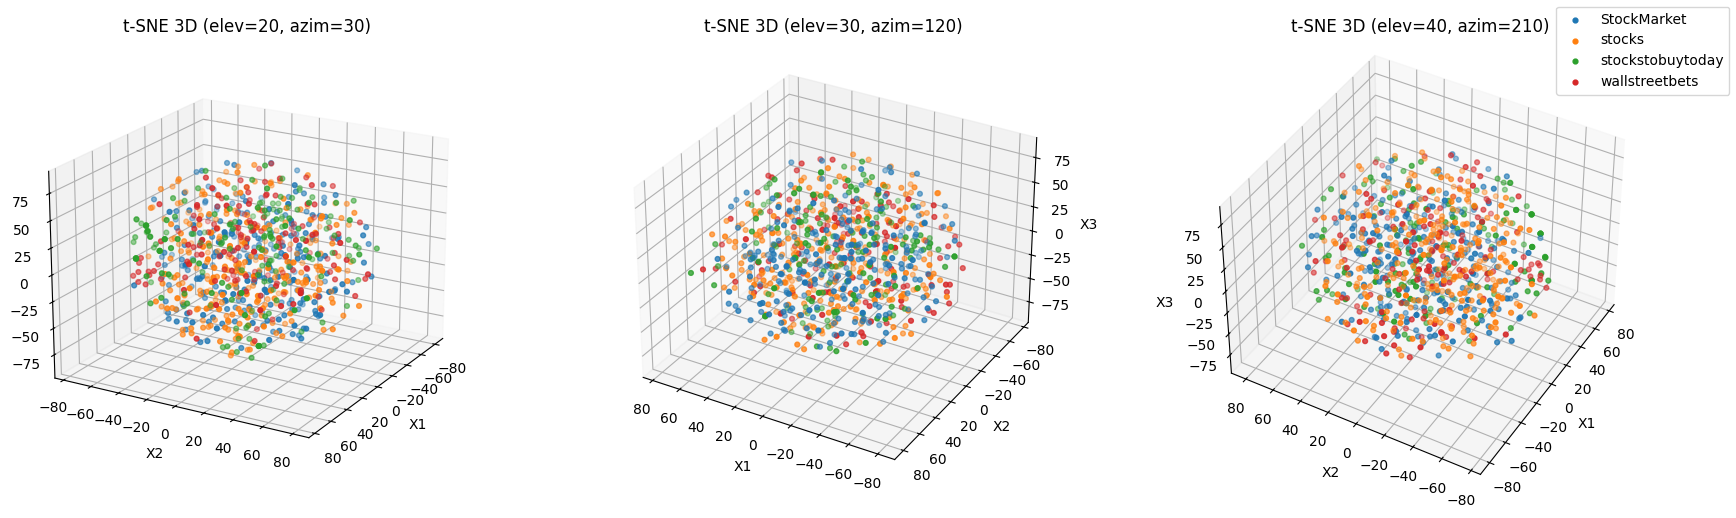

/Users/youngjinlee/Desktop/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


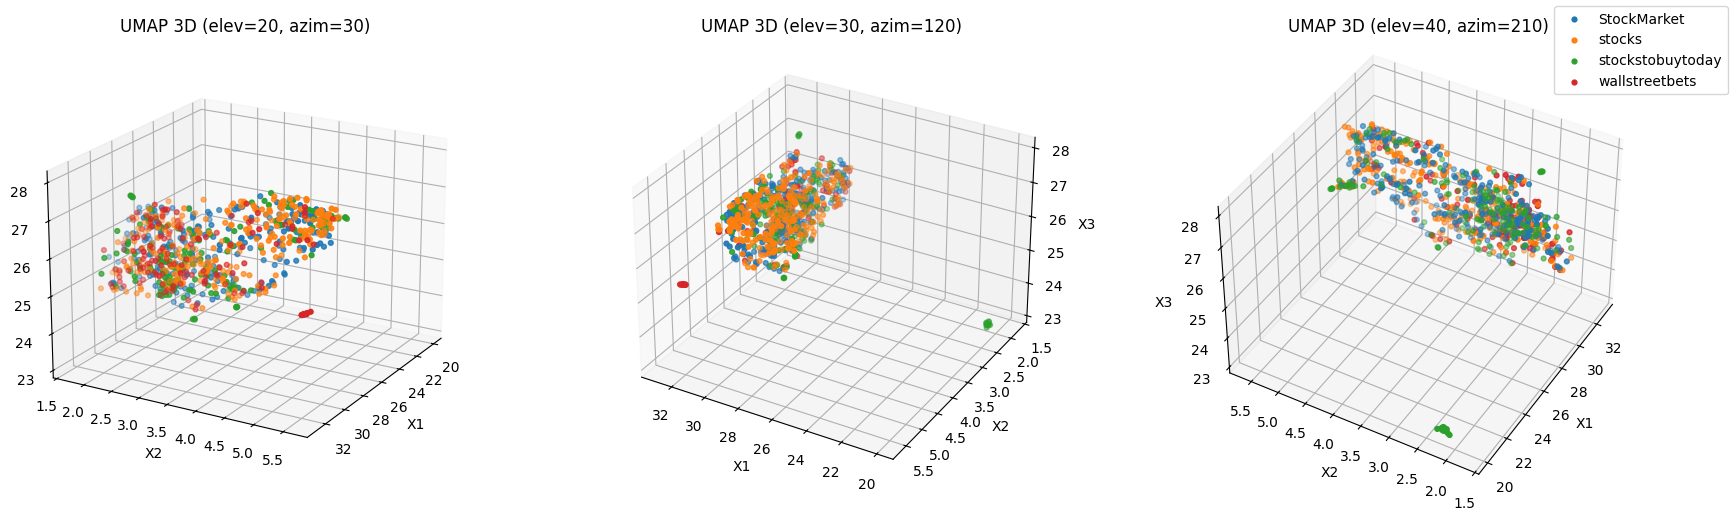

In [63]:
#Exercise 18
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns

# Prepare features + subreddit labels
X_features = np.asarray(augmented_df.values)
labels = X["category_name"].to_numpy()  

classes = np.unique(labels)
base_colors = sns.color_palette("tab10", n_colors=len(classes))

colors = {c: base_colors[i % len(base_colors)] for i, c in enumerate(classes)}


# Helper for 3D plots (3 angles)
def plot_3views(Z, title):
    views = [(20,30), (30,120), (40,210)]
    fig = plt.figure(figsize=(18,5))
    for i,(elev,azim) in enumerate(views,1):
        ax = fig.add_subplot(1,3,i,projection='3d')
        for j,c in enumerate(classes):
            m = (labels==c)
            ax.scatter(Z[m,0], Z[m,1], Z[m,2],
                       color=colors[c], s=12, label=str(c), depthshade=True)
            
        ax.view_init(elev=elev, azim=azim)
        ax.set_title(f"{title} (elev={elev}, azim={azim})")
        ax.set_xlabel("X1"); ax.set_ylabel("X2"); ax.set_zlabel("X3")
        ax.grid(True, linestyle=':', alpha=0.3)
    fig.legend(classes, loc="upper right")
    plt.tight_layout(); plt.show()

# PCA 3D 
Z_pca = PCA(n_components=3, random_state=0).fit_transform(X_features)
plot_3views(Z_pca, "PCA 3D")

# t-SNE 3D
n = X_features.shape[0]
perp = max(5, min(30, (n-1)//3))
Z_tsne = TSNE(n_components=3, random_state=0,
              perplexity=perp, init='pca', learning_rate='auto').fit_transform(X_features)
plot_3views(Z_tsne, "t-SNE 3D")

# UMAP 3D
try:
    Z_umap = umap.UMAP(n_components=3, random_state=0,
                       n_neighbors=15, min_dist=0.1).fit_transform(X_features)
    plot_3views(Z_umap, "UMAP 3D")
except Exception:
    print("[UMAP missing] → install with: pip install umap-learn")


In [65]:
X['category_name'].value_counts()


category_name
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

In [66]:
from sklearn import preprocessing

# Initialize LabelBinarizer
mlb = preprocessing.LabelBinarizer()

# Fit on subreddit/category column
mlb.fit(X['category_name'])

# Transform 
X['bin_category'] = mlb.transform(X['category_name']).tolist()

# Check results
print("Classes:", mlb.classes_)
print(X[['category_name', 'bin_category']].head())


Classes: ['StockMarket' 'stocks' 'stockstobuytoday' 'wallstreetbets']
      category_name  bin_category
0    wallstreetbets  [0, 0, 0, 1]
1    wallstreetbets  [0, 0, 0, 1]
2       StockMarket  [1, 0, 0, 0]
3  stockstobuytoday  [0, 0, 1, 0]
4       StockMarket  [1, 0, 0, 0]


In [67]:
X[0:9]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,category_name,tokenized_text,bin_category
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,wallstreetbets,"{calls, retards, on}","[0, 0, 0, 1]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,wallstreetbets,"{first, the, make, deal, in, why, talk, about,...","[0, 0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,StockMarket,"{the, ticker, lots, in, seeing, red, of}","[1, 0, 0, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,stockstobuytoday,"{making, generations, the, with, in, have, com...","[0, 0, 1, 0]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,StockMarket,"{say, thank, didn, you, he}","[1, 0, 0, 0]"
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,https://www.reddit.com/r/wallstreetbets/commen...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,wallstreetbets,"{to, warm, me, luck, hoping, ejaculate, in, wi...","[0, 0, 0, 1]"
6,comment,2025-04-11 12:37:23,mmjx7vz,stocks,Is the market in complete denial right now?,stoniey84,https://www.reddit.com/r/stocks/comments/1jwo1...,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,stocks,"{jerome, quickly, see, adjust, the, are, tarif...","[0, 1, 0, 0]"
7,comment,2025-04-11 17:28:50,mmlhxwc,wallstreetbets,Retardation is on the menu boys! WSB is so back,OSRSkarma,https://i.redd.it/0yq2ftren8ue1.jpeg,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,wallstreetbets,"{spread, word, slowly, have, this, been, confi...","[0, 0, 0, 1]"
8,comment,2021-02-01 15:36:32,gllyi5z,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,https://www.reddit.com/r/stocks/comments/la34b...,1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,stocks,"{am, trend, perfectly, the, one, was, 52, cup,...","[0, 1, 0, 0]"


In [ ]:
#Exercise 19

Yes, it works here. The Label Binarizer converts text categories into binary one hot vectors.



In [68]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[800]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [69]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
["It's a pretty unremarkable product, but you would easily be able to find the exact company if I said what the product is.\n\nAs a distributor I don't want to leak what is basically insider information on them."]


In [70]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.061546
Cosine Similarity using count bw 2 and 3: 0.080582
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/v5/h06kf79165lc4b0f6ywj7ww40000gn/T/ipykernel_1701/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/var/folders/v5/h06kf79165lc4b0f6ywj7ww40000gn/T/ipykernel_1701/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/var/folders/v5/h06kf79165lc4b0f6ywj7ww40000gn/T/ipykernel_1701/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element f

In [73]:
#Exercise 20 Answer
from sklearn.metrics.pairwise import cosine_similarity

# Pick three new random texts (change the indices to test other ones)
doc1 = [X.iloc[50]['text']]
doc2 = [X.iloc[400]['text']]
doc3 = [X.iloc[800]['text']]

v1 = count_vect.transform(doc1)
v2 = count_vect.transform(doc2)
v3 = count_vect.transform(doc3)

#cosine similarities
sim_12 = cosine_similarity(v1, v2)[0][0]
sim_13 = cosine_similarity(v1, v3)[0][0]
sim_23 = cosine_similarity(v2, v3)[0][0]
sim_11 = cosine_similarity(v1, v1)[0][0]
sim_22 = cosine_similarity(v2, v2)[0][0]
sim_33 = cosine_similarity(v3, v3)[0][0]

#results
print("Cosine Similarity (1 vs 2): %.4f" % sim_12)
print("Cosine Similarity (1 vs 3): %.4f" % sim_13)
print("Cosine Similarity (2 vs 3): %.4f" % sim_23)
print()
print("Cosine Similarity (1 vs 1): %.4f" % sim_11)
print("Cosine Similarity (2 vs 2): %.4f" % sim_22)
print("Cosine Similarity (3 vs 3): %.4f" % sim_33)


def interpret(value):
    if value > 0.7:
        return "Highly similar (same topic)"
    elif value > 0.3:
        return "Moderately related"
    else:
        return "Unrelated or very different"

print("\nInterpretation:")
print(f"1 vs 2 → {interpret(sim_12)}")
print(f"1 vs 3 → {interpret(sim_13)}")
print(f"2 vs 3 → {interpret(sim_23)}")

Cosine Similarity (1 vs 2): 0.0000
Cosine Similarity (1 vs 3): 0.0000
Cosine Similarity (2 vs 3): 0.2741

Cosine Similarity (1 vs 1): 1.0000
Cosine Similarity (2 vs 2): 1.0000
Cosine Similarity (3 vs 3): 1.0000

Interpretation:
1 vs 2 → Unrelated or very different
1 vs 3 → Unrelated or very different
2 vs 3 → Unrelated or very different


In [121]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

categories = sorted(X['category_name'].unique())
target_names = categories

count_vect = CountVectorizer()
tdm_df = count_vect.fit_transform(X['text'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    tdm_df,
    X['category_name'],
    test_size=0.3,
    random_state=42,
    stratify=X['category_name']
)

In [122]:
X_train

<592x4346 sparse matrix of type '<class 'numpy.int64'>'
	with 12087 stored elements in Compressed Sparse Row format>

In [119]:
X_test

<255x4346 sparse matrix of type '<class 'numpy.int64'>'
	with 5106 stored elements in Compressed Sparse Row format>

In [123]:

nb_classifier = MultinomialNB(alpha=0.5)
nb_classifier.fit(X_train, y_train)

# Predict
y_pred = nb_classifier.predict(X_test)


classes = np.unique(y_test)
print("Accuracy (TDM):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred,
                            labels=classes,
                            target_names=classes,
                            digits=4))



Accuracy (TDM): 0.5686274509803921

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5238    0.5867    0.5535        75
          stocks     0.5354    0.6386    0.5824        83
stockstobuytoday     0.7708    0.7115    0.7400        52
  wallstreetbets     0.4583    0.2444    0.3188        45

        accuracy                         0.5686       255
       macro avg     0.5721    0.5453    0.5487       255
    weighted avg     0.5664    0.5686    0.5595       255



In [ ]:
import numpy as np, pandas as pd, re
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


#CSR
tdm_csr = tdm_df.tocsr() if hasattr(tdm_df, "tocsr") else csr_matrix(tdm_df)

row_sum    = np.asarray(tdm_csr.sum(axis=1)).ravel()       # total tokens per doc
row_unique = np.diff(tdm_csr.indptr)                       # number of nonzero terms
row_max    = np.asarray(tdm_csr.max(axis=1).todense()).ravel()  # max term count per doc
ttr        = row_unique / (row_sum + 1e-9)                 # type-token ratio


texts = X['text'].astype(str)
digits  = texts.str.count(r"\d")
urls    = texts.str.contains(r"https?://|www\.", regex=True)
excl    = texts.str.contains(r"!", regex=True)
caps    = texts.str.count(r"[A-Z]")
letters = texts.str.count(r"[A-Za-z]")
caps_ratio = (caps / letters.replace(0, np.nan)).fillna(0.0)



#Quantile thresholds
q_len80   = np.quantile(row_sum, 0.80)
q_uniq80  = np.quantile(row_unique, 0.80)
q_ttr20   = np.quantile(ttr, 0.20)
q_max80   = np.quantile(row_max, 0.80)
q_caps80  = np.quantile(caps_ratio, 0.80)



pattern_df = pd.DataFrame({
    "len_q80":      (row_sum    > q_len80).astype(int),
    "uniq_q80":     (row_unique > q_uniq80).astype(int),
    "ttr_low_q20":  (ttr        < q_ttr20).astype(int),
    "max_q80":      (row_max    > q_max80).astype(int),
    "has_digits":   (digits     > 0).astype(int),
    "has_url":       urls.astype(int),
    "has_exclam":    excl.astype(int),
    "caps_hi_q80":  (caps_ratio > q_caps80).astype(int),

}, index=X.index)



# Stack TDM + pattern features
X_aug = hstack([tdm_csr, csr_matrix(pattern_df.values)], format='csr')

y = X['category_name'].values
idx = np.arange(X_aug.shape[0])
i_tr, i_te, y_tr, y_te = train_test_split(idx, y, test_size=0.3, random_state=42, stratify=y)
X_tr_tdm, X_te_tdm = tdm_csr[i_tr], tdm_csr[i_te]
X_tr_aug, X_te_aug = X_aug[i_tr], X_aug[i_te]



nb_tdm = MultinomialNB(alpha=0.5).fit(X_tr_tdm, y_tr)
nb_aug = MultinomialNB(alpha=0.5).fit(X_tr_aug, y_tr)

y_pred_tdm = nb_tdm.predict(X_te_tdm)
y_pred_aug = nb_aug.predict(X_te_aug)

print("Acc TDM:", accuracy_score(y_te, y_pred_tdm))

print("Acc AUG:", accuracy_score(y_te, y_pred_aug))

print("Different predictions:", (y_pred_tdm != y_pred_aug).sum())


Acc TDM: 0.5686274509803921
Acc AUG: 0.5764705882352941
Different predictions: 14


In [ ]:
#Exercise 22
From the given results we can see that the augmented tdm has a higher accuracy than the original.
This concludes that pattern-based features (like frequent co-occurring terms or structural cues) helped the model better capture hidden relationships in text.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np


y = X['category_name'].to_numpy()
idx = np.arange(tdm_df.shape[0])
i_tr, i_te, y_tr, y_te = train_test_split(
    idx, y, test_size=0.3, random_state=42, stratify=y
)


tdm_csr = tdm_df.tocsr()  # convert if needed
X_train_tdm, X_test_tdm = tdm_csr[i_tr], tdm_csr[i_te]

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tdm, y_tr)
y_pred_dt = dt.predict(X_test_tdm)

print("Decision Tree Accuracy (TDM):", accuracy_score(y_te, y_pred_dt))
print("\nClassification Report:\n",
      classification_report(y_te, y_pred_dt,
                            target_names=sorted(np.unique(y)), digits=4))


Decision Tree Accuracy (TDM): 0.4549019607843137

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5439    0.4133    0.4697        75
          stocks     0.4615    0.4337    0.4472        83
stockstobuytoday     0.3936    0.7115    0.5068        52
  wallstreetbets     0.4615    0.2667    0.3380        45

        accuracy                         0.4549       255
       macro avg     0.4651    0.4563    0.4404       255
    weighted avg     0.4719    0.4549    0.4467       255



In [ ]:
#Exercise 23
Naives Bayes works better because it is built for the word frequencies. 
Decision Trees try to make exact word rules, so they overfit and don’t generalize that well.
Because Naives Bayes handle many feature very easily, while decision tree struggles when there are too many word features.

In [ ]:
import numpy as np, pandas as pd, re
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



count_vect = CountVectorizer()
tdm_df = count_vect.fit_transform(X['text'].astype(str))
tdm_csr = tdm_df.tocsr()



row_sum    = np.asarray(tdm_csr.sum(axis=1)).ravel()
row_unique = np.diff(tdm_csr.indptr)
row_max    = np.asarray(tdm_csr.max(axis=1).todense()).ravel()
ttr        = row_unique / (row_sum + 1e-9)


texts   = X['text'].astype(str)
digits  = texts.str.count(r"\d")
urls    = texts.str.contains(r"https?://|www\.", regex=True)
excl    = texts.str.contains(r"!", regex=True)
caps    = texts.str.count(r"[A-Z]")
letters = texts.str.count(r"[A-Za-z]")
caps_ratio = (caps / letters.replace(0, np.nan)).fillna(0.0)



q_len80  = np.quantile(row_sum, 0.80)
q_uniq80 = np.quantile(row_unique, 0.80)
q_ttr20  = np.quantile(ttr, 0.20)
q_max80  = np.quantile(row_max, 0.80)
q_caps80 = np.quantile(caps_ratio, 0.80)

pattern_df = pd.DataFrame({
    "len_q80":      (row_sum    > q_len80).astype(int),
    "uniq_q80":     (row_unique > q_uniq80).astype(int),
    "ttr_low_q20":  (ttr        < q_ttr20).astype(int),
    "max_q80":      (row_max    > q_max80).astype(int),
    "has_digits":   (digits     > 0).astype(int),
    "has_url":       urls.astype(int),
    "has_exclam":    excl.astype(int),
    "caps_hi_q80":  (caps_ratio > q_caps80).astype(int),

}, index=X.index)

X_aug = hstack([tdm_csr, csr_matrix(pattern_df.values)], format='csr')

y = X['category_name'].to_numpy()
idx = np.arange(X_aug.shape[0])
i_tr, i_te, y_tr, y_te = train_test_split(idx, y, test_size=0.3, random_state=42, stratify=y)
X_train_tdm, X_test_tdm = tdm_csr[i_tr], tdm_csr[i_te]
X_train_aug, X_test_aug = X_aug[i_tr], X_aug[i_te]



# binarized copies for BernoulliNB

X_train_tdm_bin = (X_train_tdm > 0).astype(int)
X_test_tdm_bin  = (X_test_tdm  > 0).astype(int)
X_train_aug_bin = (X_train_aug > 0).astype(int)
X_test_aug_bin  = (X_test_aug  > 0).astype(int)




models = {
    "MultinomialNB (TDM)": MultinomialNB(alpha=0.5),
    "MultinomialNB (Aug)": MultinomialNB(alpha=0.5),
    "ComplementNB (TDM)":  ComplementNB(alpha=0.5),
    "ComplementNB (Aug)":  ComplementNB(alpha=0.5),
    "BernoulliNB (TDM bin)": BernoulliNB(alpha=0.5),
    "BernoulliNB (Aug bin)": BernoulliNB(alpha=0.5),
    "Decision Tree (TDM)": DecisionTreeClassifier(random_state=42),
    "Decision Tree (Aug)": DecisionTreeClassifier(random_state=42),
}

results = {}
for name, model in models.items():
    if "Aug bin" in name:
        Xt, Xv = X_train_aug_bin, X_test_aug_bin
    elif "TDM bin" in name:
        Xt, Xv = X_train_tdm_bin, X_test_tdm_bin
    elif "Aug" in name:
        Xt, Xv = X_train_aug, X_test_aug
    else:
        Xt, Xv = X_train_tdm, X_test_tdm
    model.fit(Xt, y_tr)
    y_pred = model.predict(Xv)
    results[name] = accuracy_score(y_te, y_pred)

print(pd.Series(results, name="Accuracy").sort_values(ascending=False))


MultinomialNB (Aug)      0.576471
MultinomialNB (TDM)      0.568627
ComplementNB (TDM)       0.552941
ComplementNB (Aug)       0.552941
Decision Tree (Aug)      0.482353
BernoulliNB (TDM bin)    0.478431
BernoulliNB (Aug bin)    0.474510
Decision Tree (TDM)      0.454902
Name: Accuracy, dtype: float64


In [ ]:
#Exercise 24
Using the augmenteded data it slightly improved Naives Bayes accuracy from 0.568627 to 0.576471.
This means that adding extra pattern features helped the model capture more context from the text.
The improvement is really small but shows that the augmented data provides richer information for classification.


In [ ]:
#Exercise 25
We should first understand the nature of the data and It should be selected by experimenting and comparing multiple models by using the same training and testing splits.

#Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

In [ ]:

Since it was done quickly some steps wasn't as efficient. For example, the countVectorizer was fit before splitting the data, which can cause the 
data to leak. I personally think that it is better to split first and fit the vectorizer only on the training set with stratified sampling.
For some part, we also used fixed threshold for features like the text length, but this might not work for all the datasets.
Instead of that using the quantiles or normalized ratios would make them more adaptive.
We could also improve preprocessing by cleaning the text (removing stopwords, lowercasing, and handling punctuation) and by applying TF-IDF or n-grams instead of simple word counts.
These adjustments would make the model more robust and help it generalize better to unseen data.